In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('cleaned_data.csv')

<AxesSubplot:>

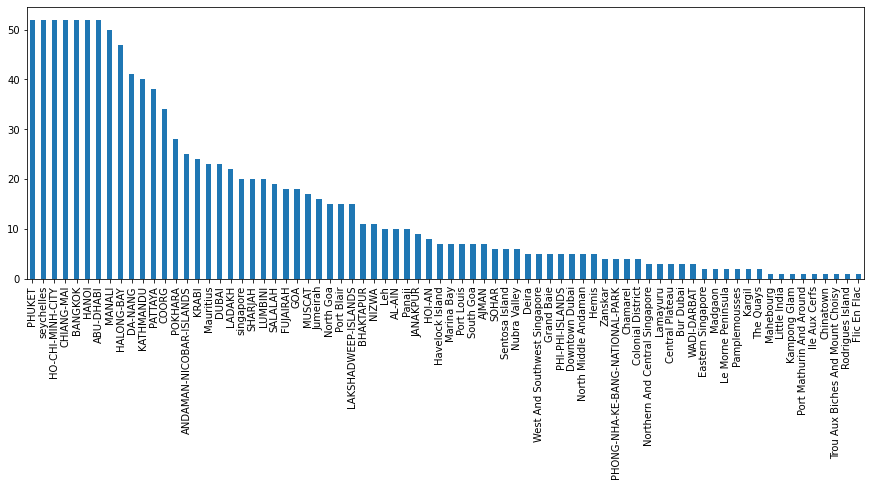

In [3]:
data['location'].value_counts().plot(y='count', x='location', kind='bar', figsize=(15,5))

In [4]:
print(data['heading'][10])
print(data['text'][10])
print('*'*100)
print(data['heading'][1020])
print(data['text'][1020])

Dubai Fountain
 Dubai Fountain is the world's largest choreographed water fountain located in the beautiful Burj Complex. This dancing fountain surges as high as 150 meters in complete synchronisation to classical, Arabic and other popular world musical numbers. Forming beautiful arcs and jumping to the beats, this fountain was designed by California-based WET, the creators of the Fountains of Bellagio in Las Vegas. The show begins in the evening every day, and the best way to approach it is through the Dubai Mall. 
****************************************************************************************************
Ba Na Hills
 Ba Na Hills is a popular resort complex and hill station located at a height of 1489 meters on the Truong Son Mountains in Da Nang. Also known as Nui Chua, it houses a fantasy park with rides. The Ba Na Cable Car is the longest cable car running on a single track and has been included in the Guinness World Records. 


<AxesSubplot:title={'center':'Word count'}, ylabel='Frequency'>

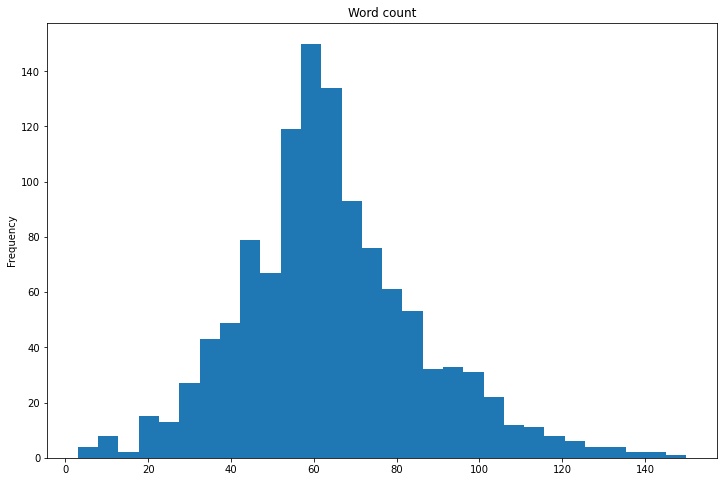

In [5]:
#Word count
data['word_count'] = data['text'].apply(lambda x: len(x.strip().split()))
data['word_count'].plot(kind='hist', bins=30, figsize=(12,8), title='Word count')

<AxesSubplot:title={'center':'Top 20 POS tags'}>

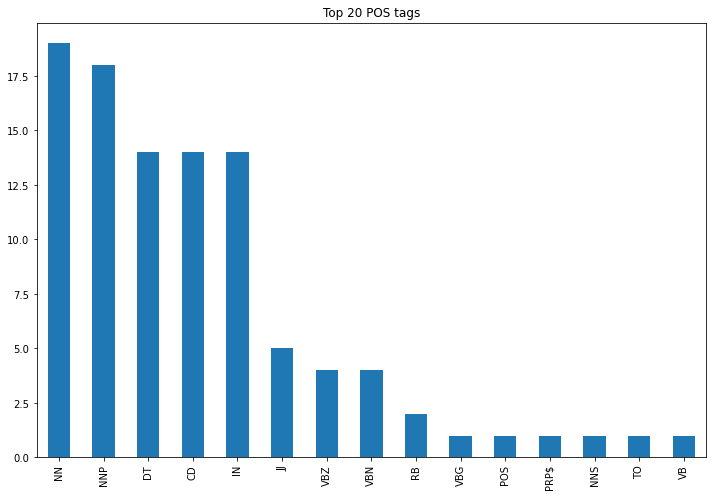

In [6]:
from textblob import TextBlob

# THE DISTRIBUTION OF POS TAGS
blob = TextBlob(str(data['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(12, 8), title = "Top 20 POS tags")

<AxesSubplot:title={'center':'bigram distribution'}, xlabel='bigram'>

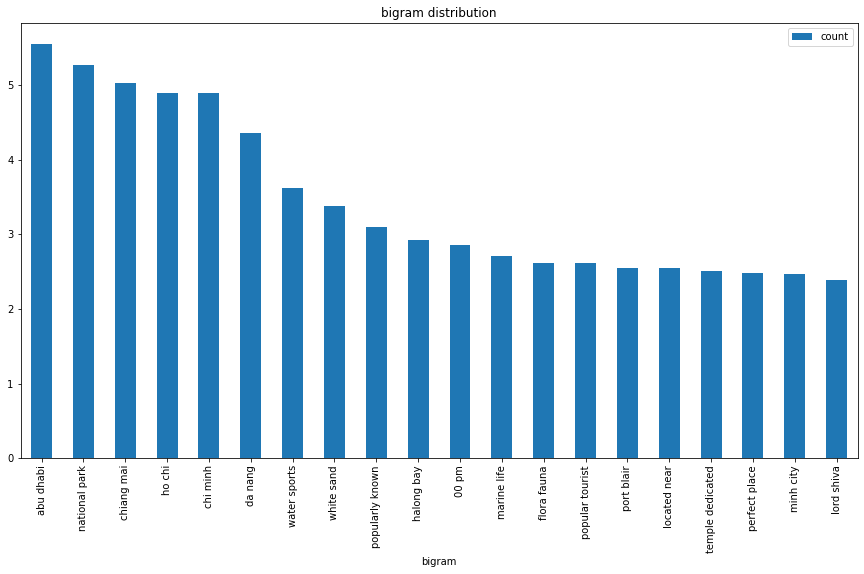

In [7]:
#plotting bi-grams frequency distribution
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(2,2), stop_words='english')
tfidf_mat = tfidf.fit_transform(data['text'])
total_words = tfidf_mat.sum(axis=0)
freq = [(word, total_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)
bigram = pd.DataFrame(freq, columns=['bigram', 'count'])
bigram.head(20).plot(x='bigram', y='count', kind='bar', title='bigram distribution', figsize=(15,8))

<AxesSubplot:title={'center':'trigram distribution'}, xlabel='bigram'>

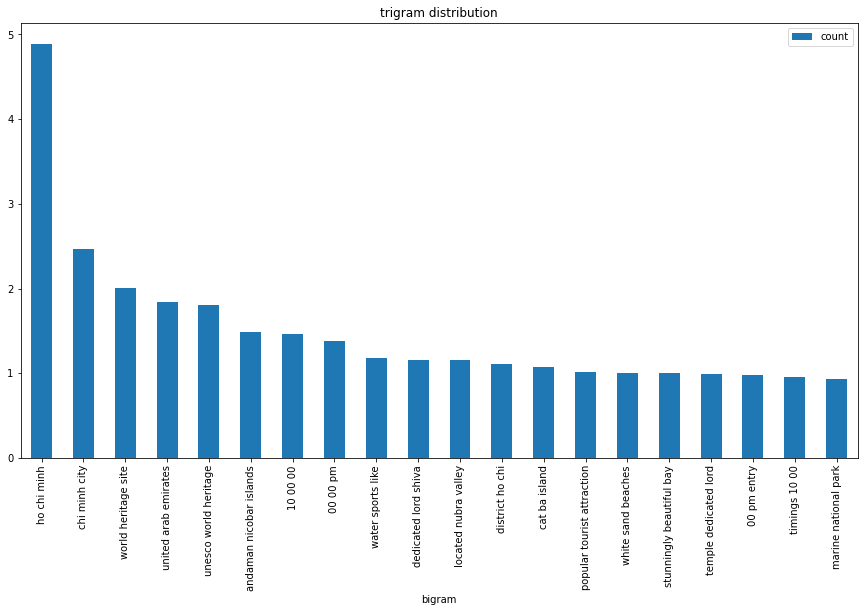

In [8]:
#plotting tri-gram distribution
tfidf = TfidfVectorizer(ngram_range=(3,3), stop_words='english')
tfidf_mat = tfidf.fit_transform(data['text'])
total_words = tfidf_mat.sum(axis=0)
freq = [(word, total_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)
trigram = pd.DataFrame(freq, columns=['bigram', 'count'])
trigram.head(20).plot(x='bigram', y='count', kind='bar', title='trigram distribution', figsize=(15,8))